In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

from sqlalchemy import func

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

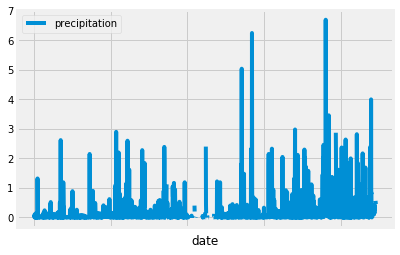

In [76]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
session.query(Measurement).filter(Measurement.date.between('2016-08-23','2017-08-23'))
query_date = dt.date(2017,8,23) - dt.timedelta(days=365)

date = []
precip_data = []
data = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>=query_date).all()
for data in data:
    precip_data.append(data.prcp)
    date.append(data.date)

data_df = pd.DataFrame(precip_data, index=date)


data_df.plot()
plt.legend(['precipitation'])
plt.xlabel("date")
plt.show()



In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
data_df.describe()

,0
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [14]:
# How many stations are available in this dataset?
total_stat = session.query(Station).count()
print(total_stat)

9


In [16]:
# What are the most active stations?
# List the stations and the counts in descending order.
active_stat_group = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc())
    
for stat in active_stat_group:
    print(stat)



('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [24]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
temp_values = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))
for temp in temp_values:
    print(temp)

(53.0, 87.0, 73.09795396419437)


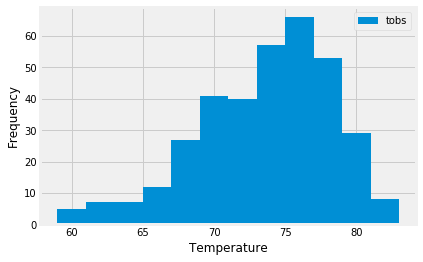

In [78]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_data = []

temp_data = session.query(Measurement.tobs, Measurement.date).filter(Measurement.station == 'USC00519281').filter(Measurement.date>=query_date).all()

for temp in temp_data:
    tobs_data.append(temp.tobs)

plt.hist(tobs_data, bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(["tobs"])
plt.show()

